# COSE474-2024F Deep Learning HW 1
- **Chapter 3**
- 2021170964 박경빈

## 0.1. Installation


In [ ]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uni



---



## 3.1. Linear Regression

### 3.1.1. Basics

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

### 3.1.1.1. Model

$$\textrm{price} = w_{\textrm{area}} \cdot \textrm{area} + w_{\textrm{age}} \cdot \textrm{age} + b.$$

Here $w_{\textrm{area}}$ and $w_{\textrm{age}}$
are called *weights*, and $b$ is called a *bias*
(or *offset* or *intercept*).
The weights determine the influence of each feature on our prediction.
The bias determines the value of the estimate when all features are zero.

$$\hat{y} = w_1  x_1 + \cdots + w_d  x_d + b.$$ (in general the "hat" symbol denotes an estimate)

Collecting all features into a vector $\mathbf{x} \in \mathbb{R}^d$
and all weights into a vector $\mathbf{w} \in \mathbb{R}^d$,
$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

### 3.1.1.2. Loss Function

*Loss functions* quantify the distance
between the *real* and *predicted* values of the target.
- The loss will usually be a nonnegative number
where smaller values are better
and perfect predictions incur a loss of 0.
- The most common loss function is the squared error

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

To measure the quality of a model on the entire dataset of $n$ examples,
we simply average (or equivalently, sum)
the losses on the training set:

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

When training the model, we seek parameters ($\mathbf{w}^*, b^*$)
that minimize the total loss across all training examples:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### 3.1.1.3. Analytic Solution

Linear regression presents us with
a surprisingly easy optimization problem. We can find the optimal parameters analytically by applying a simple formula as follows.
- First, we can subsume the bias $b$ into the parameter $\mathbf{w}$
by appending a column to the design matrix consisting of all 1s.
- Then our prediction problem is to minimize $\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$.
As long as the design matrix $\mathbf{X}$ has full rank
(no feature is linearly dependent on the others),
then there will be just one critical point on the loss surface
and it corresponds to the minimum of the loss over the entire domain.
- Taking the derivative of the loss with respect to $\mathbf{w}$
and setting it equal to zero yields:

$$\begin{aligned}
    \partial_{\mathbf{w}} \|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2 =
    2 \mathbf{X}^\top (\mathbf{X} \mathbf{w} - \mathbf{y}) = 0
    \textrm{ and hence }
    \mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{X} \mathbf{w}.
\end{aligned}$$

Solving for $\mathbf{w}$ provides us with the optimal solution

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}$$

which only is unique when the matrix $\mathbf X^\top \mathbf X$ is invertible (=when the columns of the design matrix
are linearly independent)

### 3.1.1.4. Minibatch Stochastic Gradient Descent


**Minibatch Stochastic Gradient Descent (SGD)** is an optimization technique used to iteratively reduce error in deep learning models by updating model parameters.
- Instead of using the entire dataset (as in traditional gradient descent) or a single example (as in stochastic gradient descent), minibatch SGD updates the model based on a small random subset of the data (typically 32-256 samples).
- This balances efficiency and statistical robustness, leveraging faster computations like matrix--vector multiplications while avoiding the limitations of using a full dataset or individual samples.

In its most basic form, in each iteration $t$,
- randomly sample a minibatch $\mathcal{B}_t$
consisting of a fixed number $|\mathcal{B}|$ of training examples.
- compute the derivative (gradient) of the average loss
on the minibatch with respect to the model parameters.
- Finally, we multiply the gradient
by a predetermined small positive value $\eta$,
called the *learning rate*, and subtract the resulting term from the current parameter values.
We can express the update as follows:

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

In summary, minibatch SGD proceeds as follows:
1. initialize the values of the model parameters, typically at random;
2. iteratively sample random minibatches from the data,
updating the parameters in the direction of the negative gradient.
For quadratic losses and affine transformations,
this has a closed-form expansion:

$$\mathbf{w} \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)\\ $$

$$ b \leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_b l^{(i)}(\mathbf{w}, b) = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)$$

In **minibatch stochastic gradient descent**, the minibatch size and learning rate are considered *hyperparameters*, which are set before training and not updated during the process. These can be optimized using techniques like **Bayesian optimization**.

- After training for a set number of iterations, the learned model parameters ($\hat{\mathbf{w}}, \hat{b}$) are recorded, though they may not be exact minimizers due to randomness in minibatch selection and the nature of deep learning loss surfaces, which often contain many minima and saddle points.
- The goal is not to find the exact parameters but ones that generalize well to unseen data, a key challenge known as *generalization*.

### 3.1.1.5. Predictions

Given the model $\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$,
we can now make *predictions* for a new example,
e.g., predicting the sales price of a previously unseen house
given its area $x_1$ and age $x_2$.

### 3.1.2. Vectorization for Speed

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

First Method:

In [ ]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.19830 sec'

Second Method:

In [ ]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00022 sec'

The second method is dramatically faster than the first. Vectorizing code often yields order-of-magnitude speedups. Moreover, we push more of the mathematics to the library so we do not have to write as many calculations ourselves, reducing the potential for errors and increasing portability of the code.

### 3.1.3. The Normal Distribution and Squared Loss

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

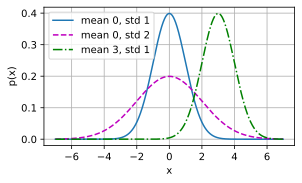

In [ ]:
# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])


Changing the mean of a distribution shifts it along the $x$-axis, while increasing the variance spreads it out, lowering its peak.

To motivate linear regression with squared loss, assume observations come from noisy measurements, where noise $\epsilon$ follows a normal distribution: $ \mathcal{N}(0, \sigma^2)$. The likelihood of observing a particular $y$ for a given $\mathbf{x}$ is:

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \textrm{ where } \epsilon \sim \mathcal{N}(0, \sigma^2).$$

Thus, we can now write out the *likelihood*
of seeing a particular $y$ for a given $\mathbf{x}$ via

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

As such, the likelihood factorizes.
According to *the principle of maximum likelihood*,
the best values of parameters $\mathbf{w}$ and $b$ are those
that **maximize the likelihood** of the entire dataset:

$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)} \mid \mathbf{x}^{(i)}).$$

The equality follows since all pairs $(\mathbf{x}^{(i)}, y^{(i)})$
were drawn independently of each other.
Estimators chosen according to the principle of maximum likelihood
are called *maximum likelihood estimators*.
- For historical reasons, optimizations are more often expressed
as minimization rather than maximization.
So, without changing anything,
we can *minimize* the *negative log-likelihood*,
which we can express as follows:

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

If we assume that $\sigma$ is fixed,
we can ignore the first term,
because it does not depend on $\mathbf{w}$ or $b$.
The second term is identical
to the squared error loss introduced earlier,
except for the multiplicative constant $\frac{1}{\sigma^2}$.
Fortunately, the solution does not depend on $\sigma$ either.
It follows that minimizing the mean squared error
is equivalent to the maximum likelihood estimation
of a linear model under the assumption of additive Gaussian noise.

### 3.1.4. Linear Regression as a Neural Network

![Linear regression is a single-layer neural network.](http://d2l.ai/_images/singleneuron.svg)

The inputs are $x_1, \ldots, x_d$.
We refer to $d$ as the *number of inputs*
or the *feature dimensionality* in the input layer.
The output of the network is $o_1$.
Because we are just trying to predict
a single numerical value,
we have only one output neuron.
Note that the input values are all *given*.
There is just a single *computed* neuron.
In summary, we can think of linear regression
as a single-layer fully connected neural network.
We will encounter networks
with far more layers
in later chapters.

### 3.1.4.1. Biology

Though linear regression predates computational neuroscience, it was a natural starting point for early models of artificial neurons developed by McCulloch and Pitts. They drew inspiration from biological neurons, with dendrites for inputs, a nucleus as the processor, and axons for outputs, connecting to other neurons via synapses.

![The real neuron (source: "Anatomy and Physiology" by the US National Cancer Institute's Surveillance, Epidemiology and End Results (SEER) Program).](http://d2l.ai/_images/neuron.svg)
:label:`fig_Neuron`

- Information $x_i$ arriving from other neurons
(or environmental sensors) is received in the dendrites.
In particular, that information is weighted
by *synaptic weights* $w_i$,
determining the effect of the inputs,
e.g., activation or inhibition via the product $x_i w_i$.
- The weighted inputs arriving from multiple sources
are aggregated in the nucleus
as a weighted sum $y = \sum_i x_i w_i + b$,
possibly subject to some nonlinear postprocessing via a function $\sigma(y)$.
- This information is then sent via the axon to the axon terminals,
where it reaches its destination
(e.g., an actuator such as a muscle)
or it is fed into another neuron via its dendrites.

## 3.2. Object-Oriented Design for Implementation

In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1. Utilities

In [ ]:
def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [ ]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [ ]:
class HyperParameters:
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [ ]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [ ]:
class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

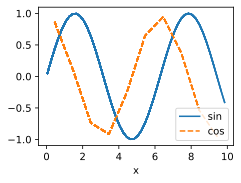

In [ ]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2. Models

In [ ]:
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3. Data

In [ ]:
class DataModule(d2l.HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### 3.2.4. Training

In [ ]:
class Trainer(d2l.HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

## 3.4. Linear Regression Implementation from Scratch

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1. Defining the Model

In [ ]:
class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2. Defining the Loss Function

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3. Defining the Optimization Algorithm

In [ ]:
class SGD(d2l.HyperParameters):
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4. Training

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

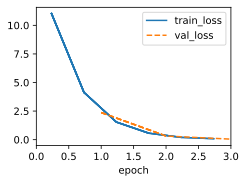

In [ ]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1268, -0.1480])
error in estimating b: tensor([0.2158])


# Discussions & Exercises

### 3.1. Discussion

- We explored traditional linear regression, where the parameters of a linear function are chosen to minimize squared loss on the training set.
- This approach was motivated by both practical considerations and its interpretation as **maximum likelihood estimation** under the assumption of *linearity* and *Gaussian noise*.
- After discussing both computational considerations and connections to statistics, we showed how such linear models could be expressed as simple neural networks where the inputs are directly wired to the output(s).
- They are sufficient to introduce most of the components that all of our models require: *parametric forms, differentiable objectives, optimization* via **minibatch stochastic gradient descent**, and ultimately, *evaluation* on previously unseen data.

### 3.2. Discussion

We used OOD (Object-Oriented Design) to implement a trainable model:
```
class Module(nn.Module, d2l.HyperParameters)
```
```
class DataModule(d2l.HyperParameters)
```
```
class Trainer(d2l.HyperParameters)
```

Moreover, these fully implemented classes are saved in the D2L library, a lightweight toolkit that makes structured modeling for deep learning easy.
- We can reuse many components between projects without changing much at all.
- We can replace just the optimizer, just the model, just the dataset, etc.; this degree of modularity pays dividends throughout the book in terms of conciseness and simplicity

### 3.2. Exercises & My Own Experiments
1. Locate full implementations of the above classes that are saved in the D2L library. We strongly recommend that you look at the implementation in detail once you have gained some more familiarity with deep learning modeling.
2. Remove the save_hyperparameters statement in the B class. Can you still print self.a and self.b? Optional: if you have dived into the full implementation of the HyperParameters class, can you explain why?

**1. Locate full implementations of the above classes that are saved in the D2L library. We strongly recommend that you look at the implementation in detail once you have gained some more familiarity with deep learning modeling.**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# 3.2.2. Code Edited

class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = d2l.ProgressBoard()

    def loss(self, y_hat, y):
        return nn.CrossEntropyLoss()(y_hat, y)

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is not defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not initialized'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=0.1)

In [ ]:
# 3.2.3. Code Edited

class DataModule(d2l.HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4, batch_size=64):
        self.save_hyperparameters()
        self.transform = transforms.Compose([transforms.ToTensor()])
        self.batch_size = batch_size

    def get_dataloader(self, train):
        dataset = datasets.FashionMNIST(root=self.root, train=train, transform=self.transform, download=True)
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=train, num_workers=self.num_workers)

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [ ]:
# 3.2.4. Code Edited

class Trainer(d2l.HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs=10, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        self.model.train()
        for batch in self.train_dataloader:
            self.train_batch_idx += 1
            self.optim.zero_grad()
            l = self.model.training_step(batch)
            l.backward()
            self.optim.step()
        if self.val_dataloader:
            self.model.eval()
            for batch in self.val_dataloader:
                self.model.validation_step(batch)

In [ ]:
# A random NN model created just to test out D2L libraries and classes

class SimpleNN(Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

In [ ]:
data = DataModule(batch_size=64)
model = SimpleNN()
trainer = Trainer(max_epochs=5)

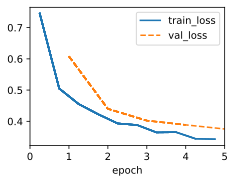

In [ ]:
# Training & Validating a FashionMNIST dataset by using classes: Module, DataModule, Trainer

trainer.fit(model, data)



---



**2. Remove the save_hyperparameters statement in the B class. Can you still print self.a and self.b? Optional: if you have dived into the full implementation of the HyperParameters class, can you explain why?**



In [ ]:
# Error happens when save_hyperparameters statement from B class is gone

class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

AttributeError: 'B' object has no attribute 'a'

**Why AttributeError?**
- Since `save_hyperparameters()` is a method from class `d2l.HyperParameters`, it saves input a, b, c automatically as self.a, self.b, self.c (saving the parameters to object B)
- However, without `save_hyperparameters()`, a,b,c are nothing but just a local variable of method `__init__` and is not saved for object B.

### 3.4. Discussion

We Implemented a fully functional neural network model and training loop by:
1. Defining the Model (Simple linear regression model)
2. Defining the Loss Function
3. Defining the Optimization Algorithm **(SGD)**
4. And training!

- In this process, we built a data loader, a model, a loss function, an optimization procedure, and a visualization and monitoring tool.
- We did this by composing a Python object that contains all relevant components for training a model.
- While this is not yet a professional-grade implementation it is perfectly functional and code like this could already help you to solve small problems quickly.

### 3.4. Exercises & My Own Experiments
1. What would happen if we were to initialize the weights to zero. Would the algorithm still work? What if we initialized the parameters with variance $1000$ rather than $0.01$?
2. Assume that you are [Georg Simon Ohm](https://en.wikipedia.org/wiki/Georg_Ohm) trying to come up with a model for resistance that relates voltage and current. Can you use automatic differentiation to learn the parameters of your model?
3. Can you use [Planck's Law](https://en.wikipedia.org/wiki/Planck%27s_law) to determine the temperature of an object using spectral energy density? For reference, the spectral density $B$ of radiation emanating from a black body is $B(\lambda, T) = \frac{2 hc^2}{\lambda^5} \cdot \left(\exp \frac{h c}{\lambda k T} - 1\right)^{-1}$. Here $\lambda$ is the wavelength, $T$ is the temperature, $c$ is the speed of light, $h$ is Planck's constant, and $k$ is the Boltzmann constant. You measure the energy for different wavelengths $\lambda$ and you now need to fit the spectral density curve to Planck's law.

**1-a. What would happen if we were to initialize the weights to zero. Would the algorithm still work?**

In [ ]:
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [ ]:
class LinearRegressionZeroInit(LinearRegressionScratch):
    """Linear regression with weights initialized to zero."""
    def __init__(self, num_inputs, lr):
        super().__init__(num_inputs, lr)
        self.w = torch.zeros((num_inputs, 1), requires_grad=True)

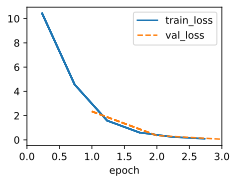

In [ ]:
model_zero_init = LinearRegressionZeroInit(2, lr=0.03)
trainer_zero_init = d2l.Trainer(max_epochs=3)
print("Training with weights initialized to zero:")
trainer_zero_init.fit(model_zero_init, data)

In [ ]:
with torch.no_grad():
    print(f'error in estimating w (zero init): {data.w - model_zero_init.w.reshape(data.w.shape)}')
    print(f'error in estimating b (zero init): {data.b - model_zero_init.b}')

error in estimating w (zero init): tensor([ 0.1567, -0.1764])
error in estimating b (zero init): tensor([0.2383])


Why initializing weight to 0 is a bad idea:
- If we initialize the weights to zero, the linear regression model would still converge and work, but the learning process is **slow at the beginning** of the training process, and less efficient.



---



**1-b. What if we initialized the parameters with variance $1000$ rather than $0.01$?**

In [ ]:
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [ ]:
class LinearRegressionLargeVariance(LinearRegressionScratch):
    """Linear regression with weights initialized with large variance."""
    def __init__(self, num_inputs, lr):
        super().__init__(num_inputs, lr)
        self.w = torch.normal(0, 1000, (num_inputs, 1), requires_grad=True)

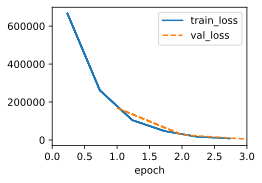

In [ ]:
model_large_variance = LinearRegressionLargeVariance(2, lr=0.03)
trainer_large_variance = d2l.Trainer(max_epochs=3)
print("\nTraining with weights initialized with large variance:")
trainer_large_variance.fit(model_large_variance, data)

In [ ]:
with torch.no_grad():
    print(f'error in estimating w (large variance): {data.w - model_large_variance.w.reshape(data.w.shape)}')
    print(f'error in estimating b (large variance): {data.b - model_large_variance.b}')

error in estimating w (large variance): tensor([-75.5174,  53.4922])
error in estimating b (large variance): tensor([-3.7389])


2 main reasons why parameters with large variance is a bad idea:
- **Gradient Explosion:** During the first few iterations, the loss might be very large, leading to large gradients, which in turn may cause the weights to update too drastically, causing the model to diverge.
- **Instability in Training:** The optimization process might become unstable, as the large initial weights could cause the model’s predictions to be far off, increasing the chance of overflows or numerical instability during training.



---



**2. Assume that you are [Georg Simon Ohm](https://en.wikipedia.org/wiki/Georg_Ohm) trying to come up with a model for resistance that relates voltage and current. Can you use automatic differentiation to learn the parameters of your model?**

In [ ]:
true_R = 5.0
I = torch.tensor([0.5, 1.0, 1.5, 2.0, 2.5])
V_true = I * true_R

R = torch.tensor(1.0, requires_grad=True)

learning_rate = 0.01
num_epochs = 100

for epoch in range(num_epochs):
    V_pred = I * R
    loss = torch.mean((V_pred - V_true) ** 2)
    loss.backward()

    with torch.no_grad():
        R -= learning_rate * R.grad
        R.grad.zero_()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Estimated R: {R.item():.4f}')

print(f'\nEstimated resistance: {R.item():.4f} ohms')


Epoch [10/100], Loss: 15.8937, Estimated R: 2.7282
Epoch [20/100], Loss: 5.1270, Estimated R: 3.7097
Epoch [30/100], Loss: 1.6539, Estimated R: 4.2672
Epoch [40/100], Loss: 0.5335, Estimated R: 4.5838
Epoch [50/100], Loss: 0.1721, Estimated R: 4.7636
Epoch [60/100], Loss: 0.0555, Estimated R: 4.8657
Epoch [70/100], Loss: 0.0179, Estimated R: 4.9237
Epoch [80/100], Loss: 0.0058, Estimated R: 4.9567
Epoch [90/100], Loss: 0.0019, Estimated R: 4.9754
Epoch [100/100], Loss: 0.0006, Estimated R: 4.9860

Estimated resistance: 4.9860 ohms




---



**3. Can you use [Planck's Law](https://en.wikipedia.org/wiki/Planck%27s_law) to determine the temperature of an object using spectral energy density? For reference, the spectral density $B$ of radiation emanating from a black body is $B(\lambda, T) = \frac{2 hc^2}{\lambda^5} \cdot \left(\exp \frac{h c}{\lambda k T} - 1\right)^{-1}$. Here $\lambda$ is the wavelength, $T$ is the temperature, $c$ is the speed of light, $h$ is Planck's constant, and $k$ is the Boltzmann constant. You measure the energy for different wavelengths $\lambda$ and you now need to fit the spectral density curve to Planck's law.**

Estimated Temperature: 5007.70 K (True Temperature: 5000 K)


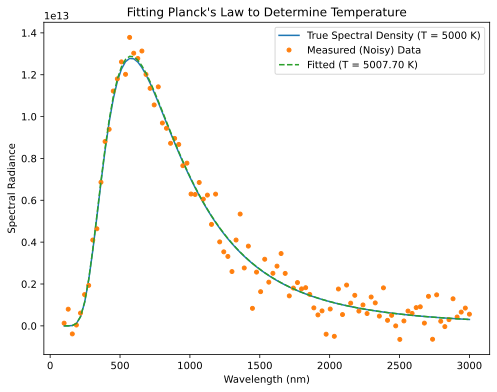

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

h = 6.626e-34
c = 3e8
k = 1.381e-23

def planck_law(wavelength, T):
    """Spectral radiance based on Planck's law."""
    term1 = 2 * h * c**2 / wavelength**5
    term2 = np.exp(h * c / (wavelength * k * T)) - 1
    return term1 / term2

T_true = 5000
wavelengths = np.linspace(1e-7, 3e-6, 100)
B_measured = planck_law(wavelengths, T_true)

B_noisy = B_measured + np.random.normal(0, 0.05 * B_measured.max(), B_measured.shape)

def fit_temperature(wavelengths, B_measured):
    popt, _ = curve_fit(planck_law, wavelengths, B_measured, p0=[3000])
    return popt[0]

T_estimated = fit_temperature(wavelengths, B_noisy)

print(f"Estimated Temperature: {T_estimated:.2f} K (True Temperature: {T_true} K)")

plt.figure(figsize=(8, 6))
plt.plot(wavelengths * 1e9, B_measured, label=f"True Spectral Density (T = {T_true} K)")
plt.plot(wavelengths * 1e9, B_noisy, 'o', label="Measured (Noisy) Data", markersize=4)
plt.plot(wavelengths * 1e9, planck_law(wavelengths, T_estimated), '--', label=f"Fitted (T = {T_estimated:.2f} K)")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance')
plt.legend()
plt.title("Fitting Planck's Law to Determine Temperature")
plt.show()


By the way, Planck's Law is a **non-linear** relationship between the wavelength $\lambda$ and the temperature $T$ since it includes exponentials.